In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
df.shape

(21263, 82)

# Split of data set

In [5]:
# Extract features (X) and target (y)
X = df.iloc[:, :81]  # Features
y = df['critical_temp']   # Target

In [6]:
# Split the dataset into training and test sets
random_seed = 2023
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# 1.a  Checking five Assumptions

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
X_train1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train1).fit()
# Add a column of ones to the feature matrix for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
# Multiple Linear Regression using normal equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ theta
# Compute R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

C:\Users\Prayag Purani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


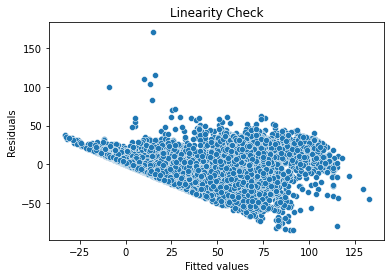

In [9]:
# Check assumptions
# 1. Linearity
# Scatter plot of residuals vs. predicted values
sns.scatterplot(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

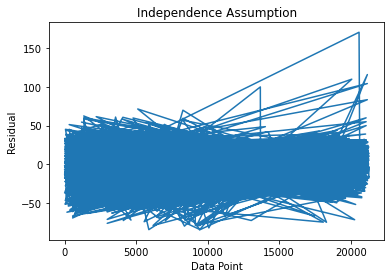

In [10]:
# 2. Independence of residuals
residuals = y_train - X_train @ theta
plt.plot(residuals)
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Independence Assumption')
plt.show()

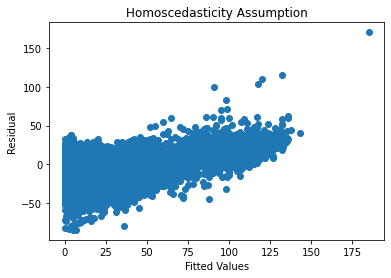

In [11]:
# 3. Homoscedasticity (Constant Variance)
plt.scatter(y_train, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Homoscedasticity Assumption')
plt.show()

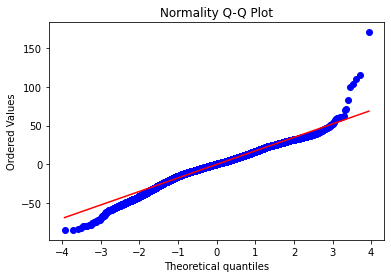

In [12]:
# 4. Normality of residuals
from scipy.stats import probplot
probplot(residuals, plot=plt)
plt.title('Normality Q-Q Plot')
plt.show()

In [13]:
# 5. No perfect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print('VIF for each feature:')
print(vif)
# VIF should be less than 10 for all variables
# Interpretation: Based on the visualizations and tests, check if assumptions are met or not.

VIF for each feature:
[1719.7993635939167, 80.35255162607619, 426.0447605453024, 839.0227355438152, 455.27344781705773, 902.2125058907174, 196.00660125549078, 148.3786250667996, 55.96343534998275, 24.26079001367438, 110.39939199098629, 83.97914657019359, 2105.3837707350285, 8528.268913737405, 1646.8525563007174, 5808.350623030543, 4107.51629361195, 173.67852890369696, 268.5171586374379, 45.341852391970406, 416.5332904043671, 480.0789344582969, 904.774801830959, 3363.014345156241, 1091.7756281844327, 4983.626292478288, 2981.88990694724, 323.87150518171103, 151.2559235695471, 21.286686061177765, 349.1982923474105, 341.7618255067749, 138.128841842716, 269.9671349866302, 210.5949678066041, 372.99319692085663, 99.88615216360728, 50.97056619802191, 54.04071258577152, 27.329589396285513, 94.85962623283218, 47.913976131400254, 113.9566242053223, 181.17662780225456, 94.68113365904394, 135.75563258973793, 54.986044703042054, 27.295942640484313, 71.70873044915865, 24.144400589677517, 110.85103792

# 1.b Derive the equation

# 1.c Standardization 

In [14]:
# Extract features (X) and target (y)
X = df.iloc[:, :81]  # Features
y = df['critical_temp']   # Target

In [15]:
# Split the dataset into training and test sets
random_seed = 2023
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

# 1.d Optimal values of intercept

In [19]:
import numpy as np

# Calculate the coefficients using the normal equation
XtX_inv = np.linalg.pinv(X_train_scaled.T @ X_train_scaled)
Xty = X_train_scaled.T @ y_train
beta_optimal = XtX_inv @ Xty

In [20]:
beta_optimal

array([  -4.69389941,   28.39967588,  -34.54166212,  -18.50284048,
         27.43008693,  -11.72234227,    1.2177059 ,   12.51078731,
          0.76411668,  -12.57153325,    2.88307004,   11.6734808 ,
        -25.6337268 ,   -9.49991357,   23.30780151,  -45.79015162,
         14.26269082,   20.67842769,    5.19991763,  -21.00807323,
         -2.86161686,  -10.88433837,   93.27802545,    4.62217687,
       -101.87293661,   30.1348673 ,   18.09896967,   13.74068673,
         -3.37098898,   -8.76831049,   -7.79010224,  -13.94004328,
          0.45058833,    4.01841449,    9.48564274,    4.19656964,
         -6.0475069 ,   -7.05149413,   -0.43436155,   10.37497201,
         -2.50320164,   -3.14806736,   16.24923833,    5.37959114,
        -17.93810357,    1.30887266,   -6.00707712,  -20.9186652 ,
         -3.65238182,   26.33105746,  -10.96230426,   18.58645616,
        -27.48511627,  -15.37758784,   21.88969331,   -7.27139551,
          9.37694102,   -7.91053125,    6.37935361,   -3.78832

# 1.e Find Y predict

In [21]:
#X_test_scaled = sm.add_constant(X_test_scaled)
y_pred = X_test_scaled @ beta_optimal

# Create a dataframe with y_actual and ŷ_predict
results_df = pd.DataFrame({'y_actual': y_test, 'ŷ_predict': y_pred})

In [22]:
results_df

,y_actual,ŷ_predict
2862,77.80,27.813682
13507,2.00,-22.660371
4350,28.10,32.105373
14758,0.02,-32.390831
6736,61.10,33.378494
...,...,...
9271,68.00,36.634057
15516,2.77,-28.632659
11935,3.64,-27.710088
16352,6.20,-36.769094


# 1.f R2 and MSE

In [23]:
# Predict using the optimal coefficients
y_pred = X_test_scaled @ beta_optimal

# Calculate R-squared
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (ssr / sst)

# Calculate MSE
mse = np.mean((y_test - y_pred)**2)

# Interpretation
print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")


R-squared: -0.26705600327785284
MSE: 1493.4528548260976
